# Projeto de TCC: ***Impacto no uso de People Analytics em decisões organizacionais para identificação de talentos***

**Objetivo:** Este notebook objetiva apresentar o Trabalho de Conclusão de Curso para Data Science and Analytics, junto a USP-Esalq, utilizando a metodologia CRISP-DM, desde sua fase de Entendimento dos Dados à última etapa de Implantação. 

**Link Dataset:** https://www.kaggle.com/datasets/bhrt97/hr-analytics-classification

*Para acessar a documentação do projeto, com os insights, instruções e resultados obtidos, acesse o arquivo README.md deste repositório*

## Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ajustes visuais para visualização das tabelas e células

pd.set_option('display.max_colwidth', None) # remover truncamento de valores das colunas
pd.set_option('display.max_rows', None) # remover truncamento do número de linhas exibidas
pd.set_option('display.max_columns', None) # remover truncamento do número de colunas exibidas
pd.set_option('display.float_format', '{:.2f}'.format) # valores quebrados serão setados com 2 casas decimais

## Input dos Dados

Em base disponibilizada no Kaggle os dados de Treino e Teste estão separados, por isso, para que eu possa realizar análises estatísticas e descritivas, optei por juntá-los, apenas para essa finalidade

In [3]:
# carregando apenas base de treino para análise exploratória
df_treino = pd.read_csv("dataset/train_hr_class.csv")
print(f"DF Treino: {df_treino.shape}")
df_teste = pd.read_csv("dataset/test_hr_class.csv")
print(f"DF Teste: {df_teste.shape}")

DF Treino: (54808, 14)
DF Teste: (23490, 13)


In [4]:
df_analise = pd.concat([df_treino, df_teste], ignore_index=True)
df_analise = df_analise.sort_values("employee_id").reset_index(drop=True)
print(f"DF para análise exploratória: {df_analise.shape}")

DF para análise exploratória: (78298, 14)


## Tratamento e Limpeza dos Dados

Nesta seção, realizarei importantes etapas de tratamento de limpeza dos dados, tais como:

- Verificação de duplicidades
- Renomeio de colunas para Português-BR, a fim de facilitar a manipulação e compreensão dos dados
- Analisar o tipo dos dados, para eventuais conversões (caso necessário)
- Verificação de valores nulos e o seu devido tratamento

### Duplicidade

In [5]:
if df_analise['employee_id'].duplicated().any():
    print("Existem duplicados")
else:
    print("Não há matrículas duplicadas")

Não há matrículas duplicadas


### Renomear Variáveis

In [6]:
cols_treino = {"employee_id": "matricula", "department": "departamento", "region": "regiao", "education": "escolaridade",
               "gender": "genero", "recruitment_channel": "canal_recrutamento", "no_of_trainings": "qtd_treinamentos",
               "age": "idade", "previous_year_rating": "avaliacao_anterior", "length_of_service": "tempo_empresa",
               "KPIs_met >80%": "kpis_atingidos", "awards_won?": "premios", "avg_training_score": "media_treinamento",
               "is_promoted": "promovido"}

cols_teste = {"employee_id": "matricula", "department": "departamento", "region": "regiao", "education": "escolaridade",
              "gender": "genero", "recruitment_channel": "canal_recrutamento", "no_of_trainings": "qtd_treinamentos",
              "age": "idade", "previous_year_rating": "avaliacao_anterior", "length_of_service": "tempo_empresa",
              "KPIs_met >80%": "kpis_atingidos", "awards_won?": "premios", "avg_training_score": "media_treinamento"}

df_treino = df_treino.rename(columns=cols_treino)
df_teste = df_teste.rename(columns=cols_teste) # subconjunto dos nomes para o DF Teste não tem a variável target (promovido)
df_analise = df_analise.rename(columns=cols_treino)
df_analise.head(1)

,matricula,departamento,regiao,escolaridade,genero,canal_recrutamento,qtd_treinamentos,idade,avaliacao_anterior,tempo_empresa,kpis_atingidos,premios,media_treinamento,promovido
0,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3.00,5,0,0,85,0.00


### Tipologia dos Dados

In [7]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   matricula           78298 non-null  int64  
 1   departamento        78298 non-null  object 
 2   regiao              78298 non-null  object 
 3   escolaridade        74855 non-null  object 
 4   genero              78298 non-null  object 
 5   canal_recrutamento  78298 non-null  object 
 6   qtd_treinamentos    78298 non-null  int64  
 7   idade               78298 non-null  int64  
 8   avaliacao_anterior  72362 non-null  float64
 9   tempo_empresa       78298 non-null  int64  
 10  kpis_atingidos      78298 non-null  int64  
 11  premios             78298 non-null  int64  
 12  media_treinamento   78298 non-null  int64  
 13  promovido           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


In [8]:
def tratar_tipo_dados(df):
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass
        except TypeError:
            print(f"Não foi possível converter a coluna {col} devido a um TypeError.")
        
        if df[col].dtype == 'object' and df[col].nunique() / len(df) < 0.5:
            df[col] = df[col].astype('category')
    
    # Força a variável target 'promovido' a ser categórica, se ela existir no DF
    if 'promovido' in df.columns:
        df['promovido'] = df['promovido'].astype('category')
    
    return df

df_treino = tratar_tipo_dados(df_treino)
df_teste = tratar_tipo_dados(df_teste)
df_analise = tratar_tipo_dados(df_analise)

In [9]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   matricula           78298 non-null  int64   
 1   departamento        78298 non-null  category
 2   regiao              78298 non-null  category
 3   escolaridade        74855 non-null  category
 4   genero              78298 non-null  category
 5   canal_recrutamento  78298 non-null  category
 6   qtd_treinamentos    78298 non-null  int64   
 7   idade               78298 non-null  int64   
 8   avaliacao_anterior  72362 non-null  float64 
 9   tempo_empresa       78298 non-null  int64   
 10  kpis_atingidos      78298 non-null  int64   
 11  premios             78298 non-null  int64   
 12  media_treinamento   78298 non-null  int64   
 13  promovido           54808 non-null  category
dtypes: category(6), float64(1), int64(7)
memory usage: 5.2 MB


In [10]:
# Imprimo aqui apenas para garantir que os valores se mantém em 0 e 1

df_analise['promovido'].value_counts()

promovido
0.00    50140
1.00     4668
Name: count, dtype: int64

In [11]:
# Para o DF Treino, que irá passar por modelagem, deixamos visualmente que assuma valores de 0 ou 1, sem casas decimais
# O intuito é gerar alteração visual apenas, haja vista que o tipo do dado é categórico, entendido como duas categorias distintas

df_treino['promovido'] = df_treino['promovido'].astype(int).astype('category')
df_treino['promovido'].value_counts()

promovido
0    50140
1     4668
Name: count, dtype: int64

### Nulos

In [12]:
df_analise.isnull().sum()[df_analise.isnull().sum() > 0]

escolaridade           3443
avaliacao_anterior     5936
promovido             23490
dtype: int64

In [13]:
df_treino.isnull().sum()[df_treino.isnull().sum() > 0]

escolaridade          2409
avaliacao_anterior    4124
dtype: int64

In [14]:
df_teste.isnull().sum()[df_teste.isnull().sum() > 0]

escolaridade          1034
avaliacao_anterior    1812
dtype: int64

In [15]:
df_treino['escolaridade'].value_counts()

escolaridade
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [16]:
df_teste['escolaridade'].value_counts()

escolaridade
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

In [17]:
df_treino['avaliacao_anterior'].value_counts()

avaliacao_anterior
3.00    18618
5.00    11741
4.00     9877
1.00     6223
2.00     4225
Name: count, dtype: int64

In [18]:
df_teste['avaliacao_anterior'].value_counts()

avaliacao_anterior
3.00    7921
5.00    5097
4.00    4249
1.00    2680
2.00    1731
Name: count, dtype: int64

***Para este tratamento de dados, optarei pela imputação de valores fixos:***
- Avaliação Anterior: para quem não teve nota computada para avaliação anterior, igualaremos à zero (0)
- Escolaridade: para quem não tem registro sobre o nível de escolaridade, preencheremos com "No_Education"

In [19]:
# Dataset de treino
df_treino['escolaridade'] = df_treino['escolaridade'].cat.add_categories(['No_Education'])
df_treino['escolaridade'] = df_treino['escolaridade'].fillna('No_Education')
df_treino['avaliacao_anterior'] = df_treino['avaliacao_anterior'].fillna(0)

# Dataset de teste
df_teste['escolaridade'] = df_teste['escolaridade'].cat.add_categories(['No_Education'])
df_teste['escolaridade'] = df_teste['escolaridade'].fillna('No_Education')
df_teste['avaliacao_anterior'] = df_teste['avaliacao_anterior'].fillna(0)

# Dataset Junção
df_analise['escolaridade'] = df_analise['escolaridade'].cat.add_categories(['No_Education'])
df_analise['escolaridade'] = df_analise['escolaridade'].fillna('No_Education')
df_analise['avaliacao_anterior'] = df_analise['avaliacao_anterior'].fillna(0)

In [20]:
df_treino.isnull().sum()[df_treino.isnull().sum() > 0]

Series([], dtype: int64)

In [21]:
df_teste.isnull().sum()[df_teste.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
df_analise.isnull().sum()[df_analise.isnull().sum() > 0]

promovido    23490
dtype: int64

## Análise Exploratória dos Dados

In [23]:
df_analise.columns

Index(['matricula', 'departamento', 'regiao', 'escolaridade', 'genero',
       'canal_recrutamento', 'qtd_treinamentos', 'idade', 'avaliacao_anterior',
       'tempo_empresa', 'kpis_atingidos', 'premios', 'media_treinamento',
       'promovido'],
      dtype='object')

In [24]:
from modulo_graficos import grafico_movimentacao_promovidos

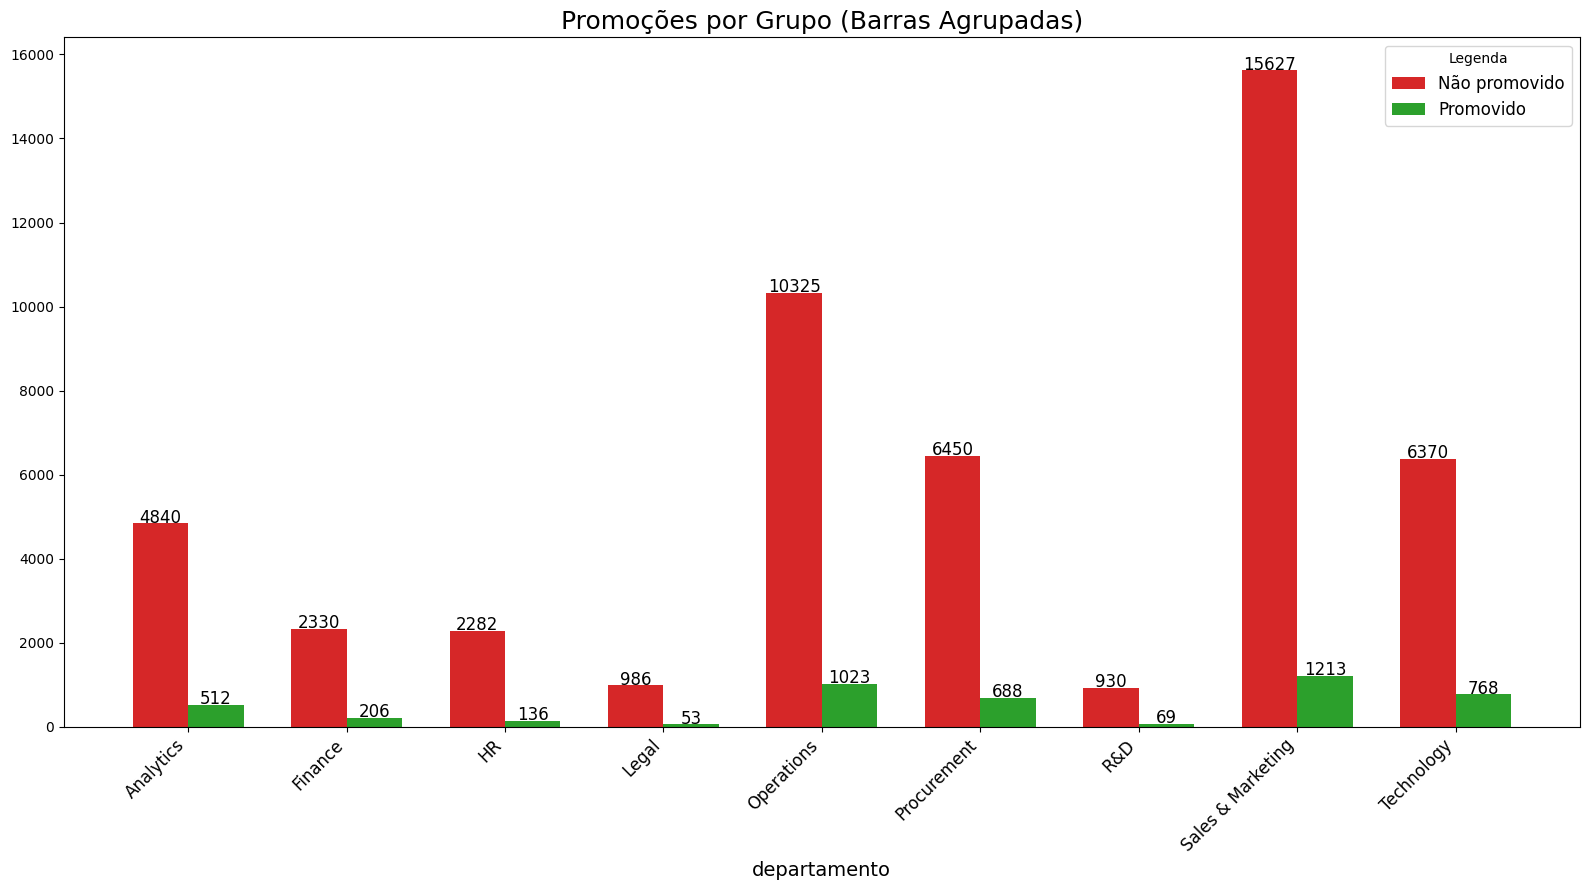

In [25]:
# Depois de importar ou copiar a função no seu notebook:
grafico_movimentacao_promovidos(df_analise, 'departamento', tipo='barras_agrupadas')

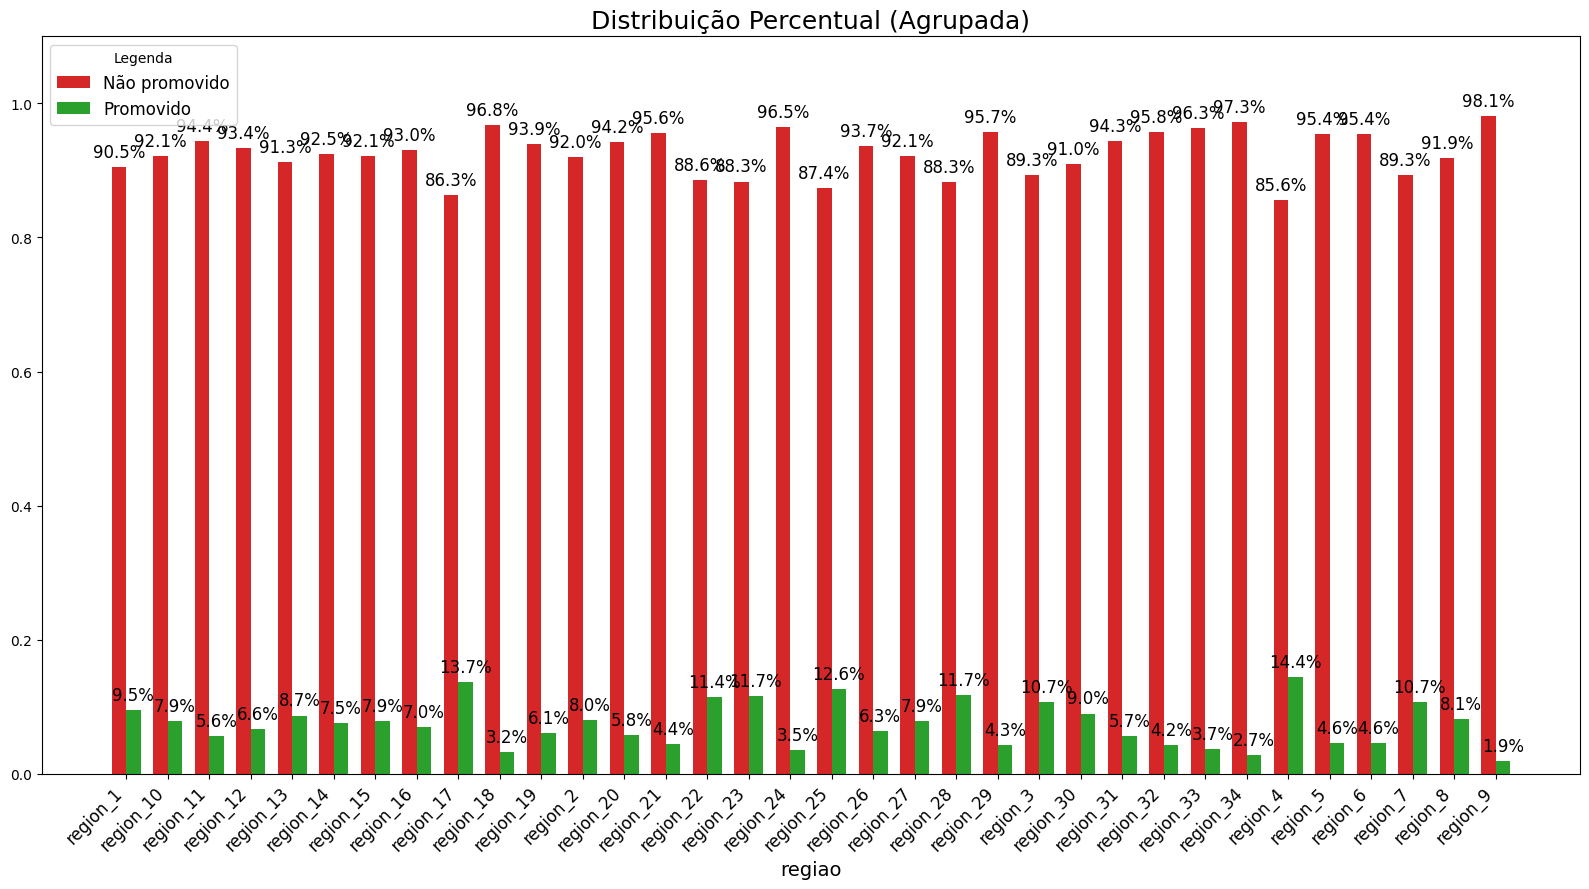

In [26]:
grafico_movimentacao_promovidos(df_analise, 'regiao', tipo='percentual_agrupado')

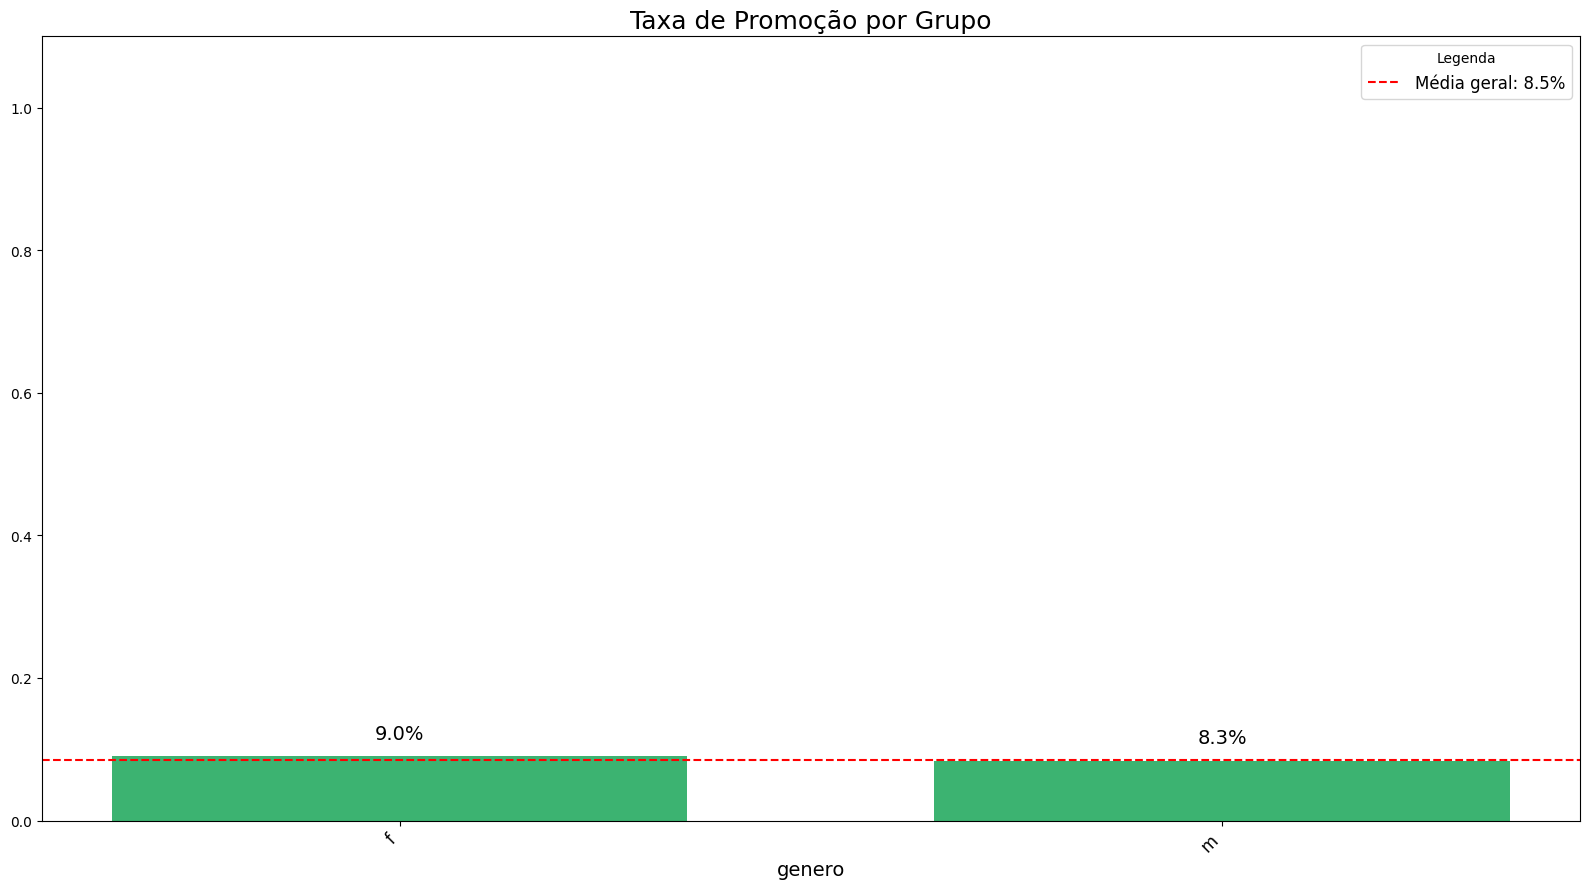

In [27]:
grafico_movimentacao_promovidos(df_analise, 'genero', tipo='taxa_promocao')

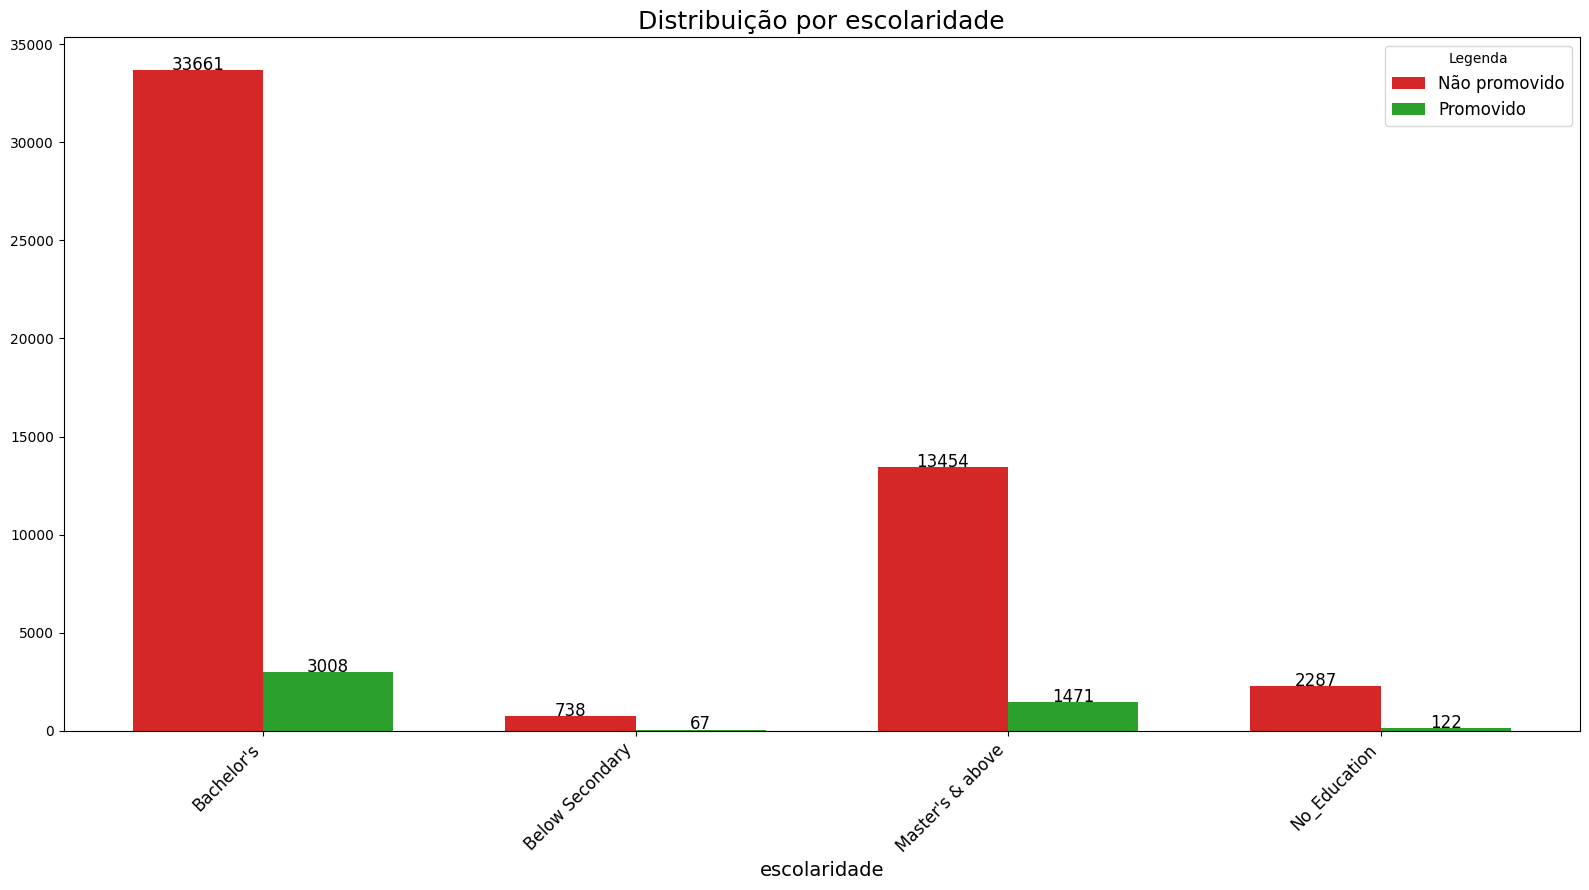

In [28]:
grafico_movimentacao_promovidos(df_analise, 'escolaridade', tipo='histograma')

In [29]:
# Estatística Descritiva
df_analise.describe().T

,count,mean,std,min,25%,50%,75%,max
matricula,78298.00,39149.50,22602.83,1.00,19575.25,39149.50,58723.75,78298.00
qtd_treinamentos,78298.00,1.25,0.61,1.00,1.00,1.00,1.00,10.00
idade,78298.00,34.80,7.67,20.00,29.00,33.00,39.00,60.00
avaliacao_anterior,78298.00,3.08,1.50,0.00,2.00,3.00,4.00,5.00
tempo_empresa,78298.00,5.85,4.25,1.00,3.00,5.00,7.00,37.00
kpis_atingidos,78298.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
premios,78298.00,0.02,0.15,0.00,0.00,0.00,0.00,1.00
media_treinamento,78298.00,63.35,13.38,39.00,51.00,60.00,76.00,99.00
